In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd #visualizacion y manipulacion de datos estructurados
import numpy as np #operacion con vectores y matrices
import matplotlib.pyplot as plt #visualizacion de datos
import plotly.express as px #creates entires figures at once

filepath = '/content/drive/MyDrive/Jupyter_Notebooks/ML_Models/datasets/electric-vehicle-charging_visualization/station_data_dataverse.csv'
ds = pd.read_csv(filepath, header=0)

In [ ]:
ds.shape #dimensiones del ds

(3395, 24)

In [ ]:
ds.head() #imprime unicamente las primeras 5 filas del ds

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [ ]:
ds.info #informacion mas detallada

<bound method DataFrame.info of       sessionId  kwhTotal  dollars              created                ended  \
0       1366563      7.78     0.00  0014-11-18 15:40:26  0014-11-18 17:11:04   
1       3075723      9.74     0.00  0014-11-19 17:40:26  0014-11-19 19:51:04   
2       4228788      6.76     0.58  0014-11-21 12:05:46  0014-11-21 16:46:04   
3       3173284      6.17     0.00  0014-12-03 19:16:12  0014-12-03 21:02:18   
4       3266500      0.93     0.00  0014-12-11 20:56:11  0014-12-11 21:14:06   
...         ...       ...      ...                  ...                  ...   
3390    7021565      6.74     0.00  0015-10-01 16:31:18  0015-10-01 19:59:08   
3391    3758092      6.86     0.00  0015-10-02 16:28:48  0015-10-02 19:27:05   
3392    5858374      6.07     0.00  0015-09-30 16:54:22  0015-09-30 20:24:06   
3393    2586645      5.74     0.00  0015-09-24 11:43:02  0015-09-24 13:55:12   
3394    7860608      6.95     0.00  0015-10-01 16:43:05  0015-10-01 19:42:06   

      s

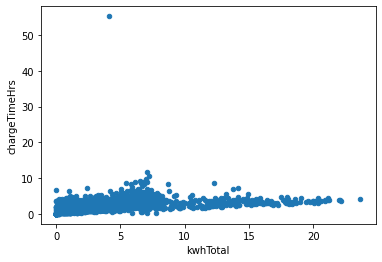

In [ ]:
#quiero comparar el uso de nergia por hora(X) contra el tiempo de carga del vehiclo en horas(Y)

ds.plot.scatter('kwhTotal','chargeTimeHrs')

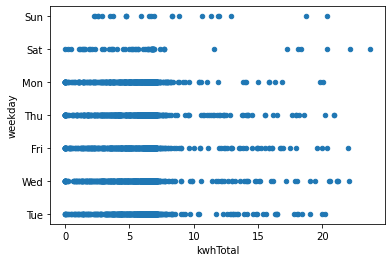

In [ ]:
#gasto de energia por dia de la semana

ds.plot.scatter('kwhTotal','weekday')

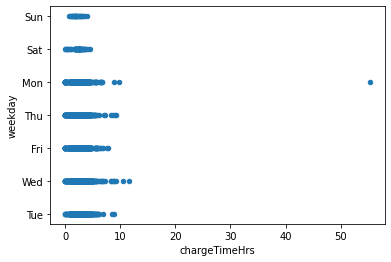

In [ ]:
#tiempo de carga por cada dia de la semana

ds.plot.scatter('chargeTimeHrs','weekday')

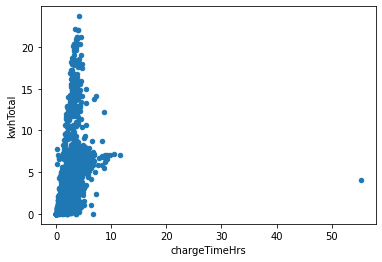

In [ ]:
#timepo de carga en horas contra su uso de kwh

ds.plot.scatter('chargeTimeHrs','kwhTotal')

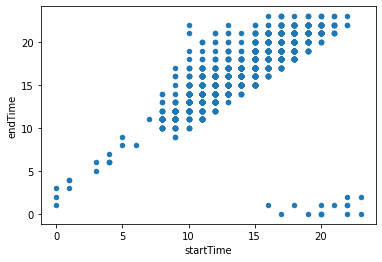

In [ ]:
#comparar la hora de inicio con la hora de carga del vehiculo, quiero conocer la moda del intervalo de carga

ds.plot.scatter('startTime','endTime')

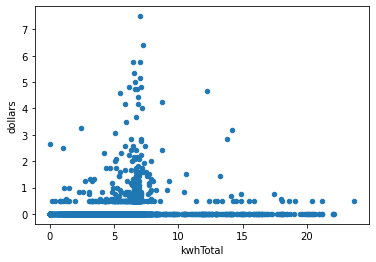

In [ ]:
#el gasto de kwh contra el dolar

ds.plot.scatter('kwhTotal','dollars')

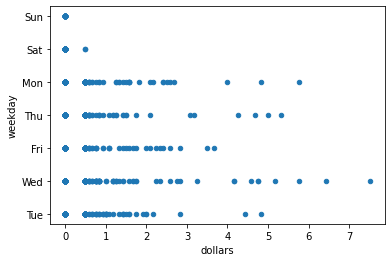

In [ ]:
ds.plot.scatter('dollars','weekday')

In [ ]:
ds.columns #print dataset columns

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')

In [ ]:
ds["Event"] = np.arange(len(ds)) #utilizaremos las 3394 filas del ds, las que representan las 3394 cargas de vehiculos dentro del ds, como nuestro eje X

px.line -> each data point is represented as a vertex (which location is given by the x and y columns) of a polyline mark in 2D space

In [ ]:
plot = px.line(ds,x="Event",y="kwhTotal",labels={"Event" : "Charging Instances", "kwhTotal" : "Energy Consumed (KWH)"}, title='Power Consumed in KWH for EV Charging')
plot.show()
#placeholder defined by curly brackets
#.format formats specific value and place it inside placeholder
print("Average power consumed: {} kwh".format(ds["kwhTotal"].mean())) #.mean calculates average of a given list of numbers

print('{0} {1}: {2} {3}'.format('Average','power consumed',5.8096,'kwh'))

Average power consumed: 5.809628865979382 kwh
Average power consumed: 5.8096 kwh


In [ ]:
plot = px.line(ds,x="Event",y="chargeTimeHrs",labels={"Event" : "Charging Instances", "chargeTimeHrs" : "Number of Hours"}, title='Time Consumed in Hours for EV Charging')
plot.show()
#placeholder defined by curly brackets
#.format formats specific value and place it inside placeholder
print("Average charging time: {} hours".format(ds["chargeTimeHrs"].mean())) #.mean calculates average of a given list of numbers

print('{0} {1}: {2} {3}'.format('Average','charging time',2.84,'hrs'))

Average charging time: 2.8414876452270987 hours
Average charging time: 2.84 hrs


Tiempo de carga por cada dia de la semana en tabla

In [ ]:
#lets take out the weekday column from the dataset and put it into a separate "charging_duration" group
charging_duration = ds.groupby('weekday').mean() #charge time by day of the week

#defining the sorter
sorter = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'] #lista con los dias de la semana
#sorting my custom list(sorter)
#creates the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter,range(len(sorter))))
#index new 'Day_id' column
charging_duration['Day_id'] = charging_duration.index #simple, just returns the index of a given element(s)
#generates a Day_id column  that will be used to sort the list numerically based on its index number
charging_duration['Day_id'] = charging_duration['Day_id'].map(sorterIndex)

#inplace -> to make a change to the 'Day_id' column and overwrite what was there before
#sort_values -> sorts in ascending or descending order of passed column, in that case, will sorts in ascending based on index number of each day of the week(rows)
charging_duration.sort_values('Day_id', inplace=True) #newer versions of pandas user 'sort_values' instead of 'sort'

charging_duration['weekday'] = charging_duration.index

#lets show dataset
charging_duration

,sessionId,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance,userId,stationId,locationId,...,Wed,Thurs,Fri,Sat,Sun,reportedZip,Events,Event,Day_id,weekday
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,5.473551e+06,5.564432,0.117922,13.832792,16.491883,2.899101,18.876122,5.540027e+07,564824.167208,627796.334416,...,0.0,0.0,0.0,0.0,0.0,0.714286,1698.711039,1698.711039,0,Mon
Tue,5.492157e+06,6.002976,0.106835,13.796850,16.601575,2.894809,18.620053,5.815988e+07,588211.861417,645801.977953,...,0.0,0.0,0.0,0.0,0.0,0.696063,1710.407874,1710.407874,1,Tue
Wed,5.310558e+06,5.820196,0.169453,13.813464,16.635344,2.937231,18.590789,5.645490e+07,578943.899018,612884.666199,...,1.0,0.0,0.0,0.0,0.0,0.709677,1713.388499,1713.388499,2,Wed
Thu,5.442267e+06,5.762082,0.100776,13.850340,16.595918,2.789266,18.623416,5.666445e+07,574418.507483,646137.345578,...,0.0,1.0,0.0,0.0,0.0,0.693878,1670.941497,1670.941497,3,Thu
Fri,5.718676e+06,5.772639,0.106803,13.724590,16.321311,2.763266,18.307373,5.701220e+07,574171.059016,621447.968852,...,0.0,0.0,1.0,0.0,0.0,0.693443,1696.613115,1696.613115,4,Fri
Sat,5.725675e+06,6.365968,0.016129,11.693548,13.741935,2.297464,22.961844,8.513633e+07,554724.790323,582450.612903,...,0.0,0.0,0.0,1.0,0.0,0.870968,1737.790323,1737.790323,5,Sat
Sun,5.802680e+06,7.632500,0.000000,10.458333,12.500000,2.100394,10.492215,8.081757e+07,713868.833333,613657.541667,...,0.0,0.0,0.0,0.0,1.0,0.625000,1513.958333,1513.958333,6,Sun


In [ ]:
ds.shape

(3395, 26)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 1   kwhTotal        3395 non-null   float64
 2   dollars         3395 non-null   float64
 3   created         3395 non-null   object 
 4   ended           3395 non-null   object 
 5   startTime       3395 non-null   int64  
 6   endTime         3395 non-null   int64  
 7   chargeTimeHrs   3395 non-null   float64
 8   weekday         3395 non-null   object 
 9   platform        3395 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3395 non-null   int64  
 12  stationId       3395 non-null   int64  
 13  locationId      3395 non-null   int64  
 14  managerVehicle  3395 non-null   int64  
 15  facilityType    3395 non-null   int64  
 16  Mon             3395 non-null   int64  
 17  Tues            3395 non-null   i